## [실습3] CNN을 활용한 Fashion-MNIST 분류 모델 구현

이번 실습에서는 초기 CNN 계열 모델인 LeNet-5 모델을 활용해서 Fashion-MNIST 분류 모델을 구현하고 모델을 학습시켜 볼 것입니다.

아래 지시사항과 보조 자료의 안내를 따라 코드를 완성하세요.

### 0. 라이브러리 불러오기

필요한 Tensorflow 라이브러리를 불러옵니다.

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.datasets import fashion_mnist

answer = {}

### 1. 데이터 탐색

Keras에 기본적으로 탑재되어 있는 Fashion-MNIST 데이터를 사용합니다. 

### 2. 데이터 전처리 (20점)

보조 자료 영상을 참고하여, 이미지 데이터의 크기를 LeNet-5의 입력 크기에 맞게 32x32 픽셀 크기로 변환하는 코드를 완성해주세요.
- MLP 모델과 달리, 일렬로 나열된 픽셀로 변환하지 않습니다.

In [2]:
# 1. 데이터 탐색
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# [지시사항 1] None 을 이미지 데이터의 크기를 LeNet-5의 입력 크기에 맞게
# 32x32 픽셀 크기로 변환하는 코드로 대체해주세요.

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# 이미지 크기를 32x32로 일괄 전처리
train_images = tf.image.resize(train_images, (32, 32))
test_images = tf.image.resize(test_images, (32, 32))

# 4-1. 검증 데이터 분할
val_size = 10000
val_images = train_images[:val_size]
val_labels = train_labels[:val_size]
train_images = train_images[val_size:]
train_labels = train_labels[val_size:]

### 아래 코드는 채점용 코드입니다. 수정하면 안됩니다.
answer["Q1-1"] = train_images.shape._dims
answer["Q1-2"] = val_images.shape._dims
answer["Q1-3"] = test_images.shape._dims

### 3-1. 모델 정의 (40점)

보조 자료 영상을 참고하여, LeNet-5 모델을 정의해주세요. <br><br>
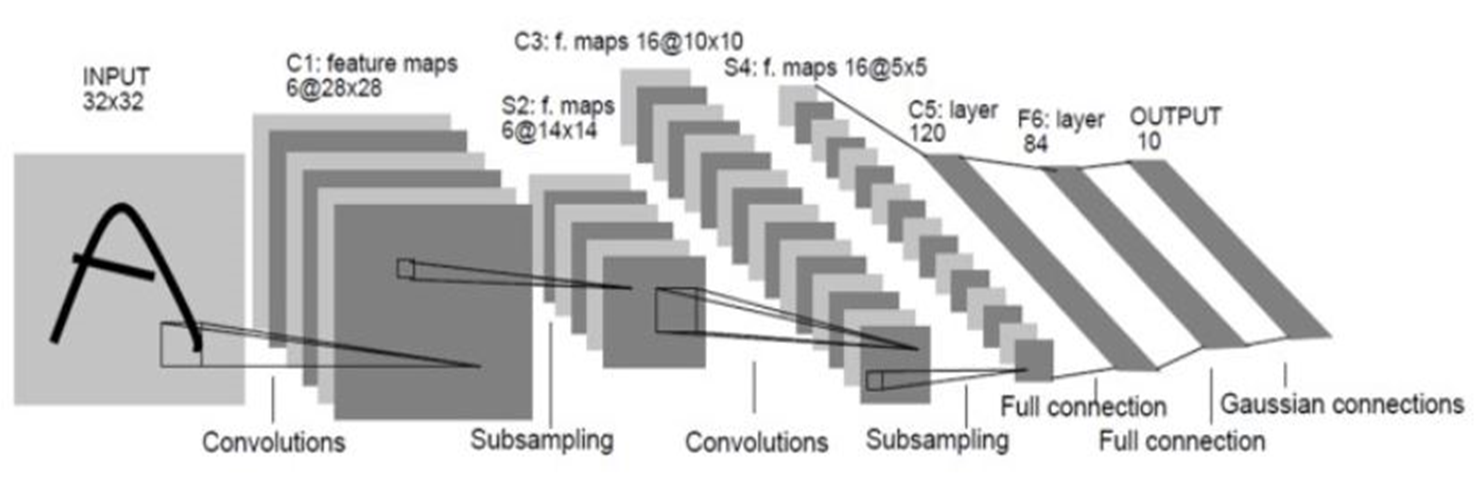

- 은닉층의 활성화 함수는 `relu`를 사용합니다.
- 출력값의 차원은 10입니다.
- 출력층의 활성화 함수는 `softmax`를 사용합니다.
- 나머지 요소는 위 다이어그램에 맞게 구현합니다.

In [3]:
# [지시사항 2] 위 다이어그램과 지시사항에 맞춰 LeNet-5 모델을 구현해주세요.
# Conv2D, MaxPooling2D, Flatten, Dense 레이어를 사용해주세요.
model = Sequential()
model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(120, activation="relu"))
model.add(Dense(84, activation="relu"))
model.add(Dense(10, activation="softmax"))

c:\Users\E010211\miniconda3\envs\DL_Base_TF\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### 3-2. 모델 컴파일

아래의 조건을 만족하도록 모델을 컴파일 합니다. 

- optimizer는 `Adam`를 사용합니다.
- loss는 `sparse_categorical_crossentropy`를 사용합니다.
- metrics는 `accuracy`를 사용합니다.

In [4]:
# 3-2. 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### 아래 코드는 채점용 코드입니다. 수정하면 안됩니다.
model.save('mnist_model.keras')

### 4. 모델 학습 (20점)
보조 자료 영상을 참고하여, None을 지시사항의 조건을 만족하도록 모델을 학습시키는 코드로 대체해주세요.
- epochs는 10으로 설정합니다.
- batch_size는 32로 설정합니다.
- 학습 데이터로 `train_images`와 `train_labels`를 사용합니다.
- 검증 데이터로 `val_images`와 `val_labels` 를 사용합니다.

In [5]:
# 4-2. 모델 학습
# [지시사항 3] 보조 자료 영상을 참고하여, None을 지시사항의 조건을 만족하도록 모델을 학습시키는 코드로 대체해주세요.
hist = model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(val_images, val_labels))

### 아래 코드는 채점용 코드입니다. 수정하면 안됩니다.
answer["Q3"] = hist.params

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7266 - loss: 1.3369 - val_accuracy: 0.8450 - val_loss: 0.4196
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8523 - loss: 0.3978 - val_accuracy: 0.8567 - val_loss: 0.3858
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8757 - loss: 0.3399 - val_accuracy: 0.8574 - val_loss: 0.3932
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8841 - loss: 0.3188 - val_accuracy: 0.8740 - val_loss: 0.3390
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8927 - loss: 0.2894 - val_accuracy: 0.8716 - val_loss: 0.3591
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8998 - loss: 0.2687 - val_accuracy: 0.8855 - val_loss: 0.3147
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9038 - loss: 0.2541 - val_accuracy: 0.8836 - val_loss: 0.3300
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9112 - loss: 0.2421 - 

### 5. 모델 평가 (20점)

보조 자료 영상을 참고하여 테스트 데이터에 대해 모델을 평가하고, loss값을 `test_loss` 변수에, 테스트 정확도 값을 `test_acc` 변수에 저장해주세요. 두 값이 특정 기준을 만족하면 점수가 부여됩니다.

In [6]:
# 5. 모델 평가
# [지시사항 4] 보조 자료 영상을 참고하여, 지시사항의 조건을 만족하도록 평가해주세요.

### 코드를 작성해주세요 ###
test_loss, test_acc = model.evaluate(test_images, test_labels)

### 아래 코드는 채점용 코드입니다. 수정하면 안됩니다.
print(f"Test accuracy: {test_acc:.3f}")
answer["Q4-1"] = test_loss
answer["Q4-2"] = test_acc

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8860 - loss: 0.3441
Test accuracy: 0.885


In [8]:
# Export data
import json
with open("submission.json", "w") as f:
    json.dump(answer, f)